### Health Insurance Cost
DESCRIPTION

Health insurance has become an indispensable part of our lives in recent years, and people are paying for it so that they are covered in the event of an accident or other unpredicted factors.
You are provided with medical costs dataset that has features such as Age, Cost, BMI.


Objective:


Determine the factors that contribute the most in the calculation of insurance costs.

Predict the health Insurance Cost.


Actions to Perform:


Find the correlation of every pair of features (and the outcome variable).

Visualize the correlations using a heatmap.

Normalize your inputs.

Use the test data to find out the accuracy of the model.

Visualize how your model uses the different features and which features have a greater effect.

**Independent variables**

1. age : age of policyholder
2. sex: gender of policy holder (female=0, male=1)
3. bmi: Body mass index, ideally 18.5 to 25
4. children: number of children / dependents of policyholder
5. smoker: smoking state of policyholder (non-smoke=0;smoker=1) 
6. region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
7. charges: individual medical costs billed by health insurance

**Target variable**

1. insuranceclaim - categorical variable (0,1)

In [4]:
# Logistic Regression if binary O/P

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
insurance = pd.read_csv("C:\\Users\\shiva\\Downloads\\1566805074_lesson_4_project\\insurance2.csv")
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [15]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [12]:
correlation = insurance.corr()
print(correlation)

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

<AxesSubplot:>

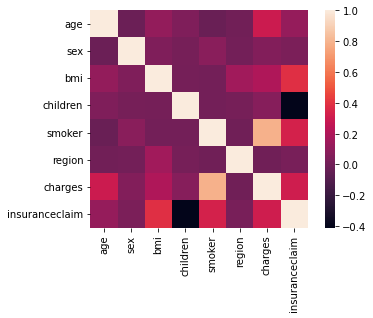

In [11]:
sns.heatmap(data = correlation, square = True)

In [16]:
insurance.shape

(1338, 8)

### Using 1000 records for training and 300 records for testing, and the last 38 records to cross check your model.

In [26]:
train = insurance[:1000]
test = insurance[1000:1300]
check = insurance[1300:]

In [27]:
X_train = np.asarray(train.drop('insuranceclaim',1))
X_test = np.asarray(test.drop('insuranceclaim',1))
y_train = np.asarray(train['insuranceclaim'])
y_test = np.asarray(test['insuranceclaim'])

Before using machine learning,normalize your inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier to understand the importance of each feature later, when looking at the model weights. Normalize the data such that each variable has 0 mean and standard deviation of 1.

In [29]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
 
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [34]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [35]:
accuracy = logreg.score(X_test, y_test)
print(accuracy*100, '%')

86.0 %


Text(0.5, 0, 'Importance')

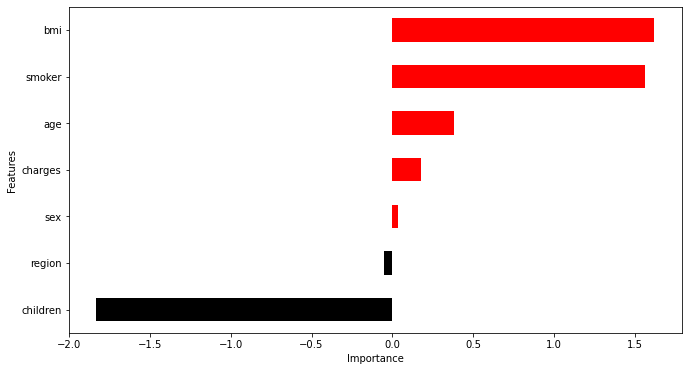

In [37]:
coeff = list(logreg.coef_[0])
labels = list(train.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'red', False: 'black'}))
plt.xlabel('Importance')